# Systematic Investment Final Project
### 2019 NYU Stern Spring Semester

#### Principal Investigators: Ruijie (Cherry) Cai (rc3470),  Zhiyu Chen (zc987) <br> Email: ruijiu.cai@stern.nyu.edu, zhiyu.chen@stern.nyu.edu


# Model simulation Using Sinopec and PetroChina Stock

**Overview:** Using two Naive Bayes Classifiers (i)Bernoulli, and (ii)Gaussian to carry out the prediction.

**Important Variables:** 

- **Momentum**：Momentum measures the rate of the rise or fall in stock prices.

- **Volatility**：Statistical measure of the dispersion of returns for a given security or market index.

- **Trading Vloume**: The amount of a stock that was traded during a given period of time

- **Stock Return**: The money made or lost on an investment.


**Access**: the file for the data is from the Data_Cleaning.

In [1]:
import numpy as np                          # foundation for pandas 
import pandas as pd                         # data package
import matplotlib.pyplot as plt             # graphics module 
from sklearn.naive_bayes import BernoulliNB # Naive Bayes classifier for multivariate Bernoulli models.

## 1. Set lable for trainning

In [2]:
train = pd.read_excel('sinopec.xlsx',parse_dates=True, index_col=0)
# Read the file that include the close price and the trading volume for sinopec

train_close = train[['close']]

train_volume = train[['vol']] 
# here vol refers to trading volume

# rolling window parameters
mom_window = 5 
# set a 5 day momentum

vol_window = 20
# set for 20-day volatility

In [3]:
# Here we labeled the trainning set using the 5 day momentum

train_close[(train_volume.isnull()) | (train_volume==0)] = np.nan

train_mom = train_close - train_close.shift(mom_window)

train_mom.dropna(axis=0, how='all',inplace=True)

train_mom = train_mom.loc['2010/3/22':]

labeled_train_mom = train_mom.apply(pd.qcut, q=5, labels=False)

labeled_train_mom = labeled_train_mom.rename(columns = {"close":"labeled_train_mom"})

labeled_train_mom.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)


,labeled_train_mom
trade_date,
2010-03-29,2
2010-03-30,1
2010-03-31,2
2010-04-01,2
2010-04-02,3


In [4]:
# Here we labeled the trainning set using the trading volume

train_volume[(train_volume.isnull()) | (train_volume==0)] = np.nan

train_volume.dropna(how='all',inplace=True)

train_volume = train_volume.loc['2010/3/22':]

labeled_train_volume = train_volume.apply(pd.qcut, q=5, labels=False)

labeled_train_volume = labeled_train_volume.rename(columns = {"vol":"labeled_train_volume"})

labeled_train_volume.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,labeled_train_volume
trade_date,
2010-03-22,4
2010-03-23,4
2010-03-24,4
2010-03-25,4
2010-03-26,4


In [5]:
# Select a particular trading period in the calendar

date_index = pd.read_excel('petrochina.xlsx',index_col=0,parse_dates=True,usecols=[0])

start_date = '2018/4/20'

end_date='2019/4/19'

date_index.sort_index(inplace=True)

new_date = date_index.loc[start_date:end_date]

trade_calendar = new_date.index

type(trade_calendar)

pandas.core.indexes.datetimes.DatetimeIndex

In [6]:
# Here we labeled the trainning set using the return

train_close.sort_index(inplace=True)

train_ret = train_close.pct_change()

train_ret.dropna(inplace=True, how='all')

train_ret = train_ret.loc['2010/3/22':]

train_ret = train_ret.rename(columns = {"close":"train_ret"})

labeled_train_ret = pd.DataFrame([])

for i in range(len(trade_calendar)-1):
    
    train_x_time = trade_calendar[i]
    train_y_time = trade_calendar[i+1]
    
    if train_ret.loc[train_y_time,'train_ret'] > 0:
        labeled_train_ret.loc[train_x_time,'labeled_train_ret'] = 1
    else:
        labeled_train_ret.loc[train_x_time,'labeled_train_ret'] = 0;

In [7]:
# Here we labeled the trainning set using the volatility

train_volatility = train_ret.rolling(vol_window).std(ddof=0)

train_volatility[(train_volume.isnull()) | (train_volume==0)] = np.nan

train_volatility.dropna(how='all',inplace=True)

train_volatility = train_volatility.loc['2010/3/22':]

labeled_train_volatility = train_volatility.apply(pd.qcut, q=5, labels=False)

labeled_train_volatility = labeled_train_volatility.rename(columns = {"train_ret":"labeled_train_volatility"})

labeled_train_volatility.head()

,labeled_train_volatility
trade_date,
2010-04-20,2
2010-04-21,2
2010-04-22,2
2010-04-23,2
2010-04-26,2


## 2. Set lable for prediction

In [8]:
predict = pd.read_excel('petrochina.xlsx',parse_dates=True, index_col=0)
# Read the file that include the close price and the trading volume for petrochina

predict_close = predict[['close']]

predict_volume = predict[['vol']]
# here vol refers to trading volume

In [9]:
# Here we labeled the trainning set using the 5 day momentum

predict_close[(predict_volume.isnull()) | (predict_volume==0)] = np.nan

predict_mom = predict_close - predict_close.shift(mom_window)

predict_mom.dropna(axis=0, how='all',inplace=True)

predict_mom = predict_mom.loc['2018/3/22':]

labeled_predict_mom = predict_mom.apply(pd.qcut, q=5, labels=False)

labeled_predict_mom = labeled_predict_mom.rename(columns = {"close":"labeled_predict_mom"})

labeled_predict_mom.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,labeled_predict_mom
trade_date,
2018-03-22,3
2018-03-23,1
2018-03-26,0
2018-03-27,0
2018-03-28,0


In [10]:
# Here we labeled the trainning set using the trading volume

predict_volume[(predict_volume.isnull()) | (predict_volume==0)] = np.nan

predict_volume.dropna(how='all',inplace=True)

predict_volume = predict_volume.loc['2018/3/22':]

labeled_predict_volume = predict_volume.apply(pd.qcut, q=5, labels=False)

labeled_predict_volume = labeled_predict_volume.rename(columns = {"vol":"labeled_predict_volume"})

labeled_predict_volume.head()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,labeled_predict_volume
trade_date,
2018-03-22,3
2018-03-23,4
2018-03-26,3
2018-03-27,2
2018-03-28,3


In [11]:
# Here we labeled the trainning set using the return

predict_close.sort_index(inplace=True)

predict_ret = predict_close.pct_change()

predict_ret.dropna(inplace=True, how='all')

predict_ret = predict_ret.loc['2018/3/22':]

predict_ret = predict_ret.rename(columns = {"close":"predict_ret"})

predict_ret.head()

,predict_ret
trade_date,
2018-03-22,0.002491
2018-03-23,-0.027329
2018-03-26,-0.010217
2018-03-27,0.005161
2018-03-28,-0.024390


In [12]:
# Here we labeled the trainning set using the volatility

predict_volatility = predict_ret.rolling(vol_window).std(ddof=0)

predict_volatility[(predict_volume.isnull()) | (predict_volume==0)] = np.nan

predict_volatility.dropna(how='all',inplace=True)

predict_volatility = predict_volatility.loc['2018/3/22':]

labeled_predict_volatility = predict_volatility.apply(pd.qcut, q=5, labels=False)

labeled_predict_volatility = labeled_predict_volatility.rename(columns = {"predict_ret":"labeled_predict_volatility"})

labeled_predict_volatility.head()

,labeled_predict_volatility
trade_date,
2018-04-20,2
2018-04-23,2
2018-04-24,2
2018-04-25,2
2018-04-26,2


## 3. Covernt labels into Dummy Variable Matrix

In [13]:
# initialize series to store strategy returns later

strategy_return = pd.Series(index=trade_calendar)

strategy_returnGA = pd.Series(index=trade_calendar)

In [14]:
# generate training data

# use +100/+200/+300 to distinguish features among volume, volatility and momentum

train_data = pd.concat([labeled_train_volume+100, labeled_train_volatility+200, labeled_train_mom+300, 
                        labeled_train_ret], axis=1)

train_data.dropna(axis=0, inplace=True, how='any')

train_data.head()

,labeled_train_volume,labeled_train_volatility,labeled_train_mom,labeled_train_ret
2018-04-20,104,201.0,302.0,0.0
2018-04-23,102,201.0,300.0,0.0
2018-04-24,102,201.0,301.0,0.0
2018-04-25,102,201.0,300.0,0.0
2018-04-26,102,201.0,300.0,1.0


In [15]:
# generate dummy variables based on labeled categories

dummy_data1 = pd.get_dummies(train_data['labeled_train_volume'])

dummy_data2 = pd.get_dummies(train_data['labeled_train_volatility'])

dummy_data3 = pd.get_dummies(train_data['labeled_train_mom'])

# concat dummy variable series into a matrix
dummy_train_x = pd.concat([dummy_data1, dummy_data2, dummy_data3], axis=1)

dummy_train_x.head()

,100.0,101.0,102.0,103.0,104.0,200.0,201.0,202.0,203.0,204.0,300.0,301.0,302.0,303.0,304.0
2018-04-20,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
2018-04-23,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2018-04-24,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2018-04-25,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
2018-04-26,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0


In [16]:
# adjust for different numbers of features from dummy_train_x & dummy_train_x
data_union = dummy_train_x.columns.union(dummy_predict_x.columns)
dummy_train_x = dummy_train_x.reindex(columns=data_union, fill_value=0)
dummy_predict_x = dummy_predict_x.reindex(columns=data_union, fill_value=0)

NameError: name 'dummy_predict_x' is not defined

In [17]:
# generate predicted data

# use +100/+200/+300 to distinguish features among volume, volatility and momentum

predict_data = pd.concat([labeled_predict_volume+100, labeled_predict_volatility+200, 
                          labeled_predict_mom+300, predict_ret], axis=1)

predict_data.dropna(axis=0, inplace=True, how='any')

predict_data.head()

,labeled_predict_volume,labeled_predict_volatility,labeled_predict_mom,predict_ret
trade_date,,,,
2018-04-20,101,202.0,302,-0.014194
2018-04-23,100,202.0,302,-0.007853
2018-04-24,102,202.0,304,0.017150
2018-04-25,100,202.0,302,-0.009079
2018-04-26,100,202.0,301,-0.011780


In [18]:
#  generate dummy variable based on labeled categories
dummy_predict_data1 = pd.get_dummies(predict_data['labeled_predict_volume'])

dummy_predict_data2 = pd.get_dummies(predict_data['labeled_predict_volatility'])

dummy_predict_data3 = pd.get_dummies(predict_data['labeled_predict_mom'])

# concat dummy variable series into a matrix
dummy_predict_x = pd.concat([dummy_predict_data1, dummy_predict_data2, dummy_predict_data3], axis=1)

dummy_predict_x.head()

,100.0,101.0,102.0,103.0,104.0,200.0,201.0,202.0,203.0,204.0,300.0,301.0,302.0,303.0,304.0
trade_date,,,,,,,,,,,,,,,
2018-04-20,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
2018-04-23,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2018-04-24,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2018-04-25,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2018-04-26,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0


## 4. Use Naive Bayes Bernoulli Classifier

In [19]:
NB = BernoulliNB()

NB.fit(dummy_train_x.values, train_data['labeled_train_ret'].values)

prediction = NB.predict(dummy_predict_x.values)

predict_data['prediction'] = prediction

predict_data.head()

,labeled_predict_volume,labeled_predict_volatility,labeled_predict_mom,predict_ret,prediction
trade_date,,,,,
2018-04-20,101,202.0,302,-0.014194,1.0
2018-04-23,100,202.0,302,-0.007853,1.0
2018-04-24,102,202.0,304,0.017150,1.0
2018-04-25,100,202.0,302,-0.009079,1.0
2018-04-26,100,202.0,301,-0.011780,1.0


In [20]:
# calculate strategy return for every trading day

for i in range(len(trade_calendar)-1):
    
    predict_y_time = trade_calendar[i+1]

    strategy_return[predict_y_time] = (predict_data.loc[predict_y_time, 'predict_ret'] * 
                                       predict_data.loc[predict_y_time, 'prediction'])

pd.DataFrame(strategy_return)

,0
trade_date,
2018-04-20,NaN
2018-04-23,-0.007853
2018-04-24,0.017150
2018-04-25,-0.009079
2018-04-26,-0.011780
2018-04-27,0.013245
2018-05-02,-0.005229
2018-05-03,0.011827
2018-05-04,0.000000


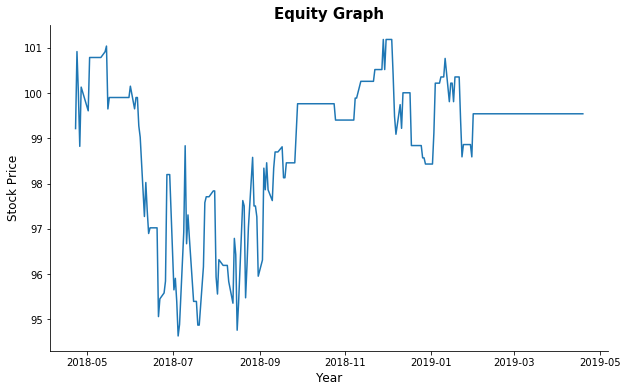

In [21]:
#draw equity graph for this strategy

fig,ax = plt.subplots(figsize=(10,6))

ax.plot(100*(strategy_return+1).cumprod(), label='strategy_return')

ax.set_title("Equity Graph", fontsize = 15, fontweight = "bold")

ax.set_ylabel("Stock Price", fontsize = 12)

ax.set_xlabel("Year", fontsize = 12)

ax.spines["top"].set_visible(False) 

ax.spines["right"].set_visible(False) 

plt.show()

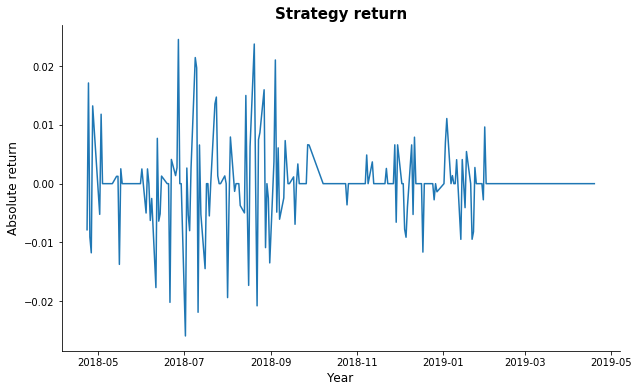

In [22]:
# strategy return

fig,ax = plt.subplots(figsize=(10,6))

ax.plot(strategy_return, label='strategy_return')

ax.set_title("Strategy return", fontsize = 15, fontweight = "bold") 

ax.set_ylabel("Absolute return", fontsize = 12)

ax.set_xlabel("Year", fontsize = 12)

ax.spines["top"].set_visible(False) 

ax.spines["right"].set_visible(False) 

plt.show()

In [23]:
# ratio serves to display different metrics that evaluates the performance of strategy

def ratio(datas):
    
    ratios = []
    
    for item in datas:
        
        data = datas[item]
        
        # sharpe ratio               
        sr = (data.mean() * 252 ** 0.5) / data.std()
        
        # number of days that the strategy wins
        num_of_up = data[data > 0].count()
        
        # number of days that the strategy loses
        num_of_down = data[data < 0].count()
        
        # win/loss ratio
        win_loss_ratio = float(num_of_up) / (num_of_up + num_of_down)
        
        # cummulative return       
        cum_ret = (data + 1).cumprod()
        
        # maximum drawdown
        drawdown = ((cum_ret.cummax() - cum_ret)/cum_ret.cummax()).max()
        
        # a temporary DataFrame for displaying result 
        temp = pd.DataFrame([sr, num_of_up, num_of_down, win_loss_ratio, drawdown], columns=[data.name], 
                            index=['Sharpe Ratio', 'Number of Up Periods', 'Number of Down Periods', 'Win/Loss Ratio','Maximum Drawdown'])
        ratios.append(temp)

    return pd.concat(ratios,axis=1,join='inner')

In [24]:
result = ratio(pd.DataFrame(strategy_return)).round(4)

result.columns = ['strategy_return']

result

,strategy_return
Sharpe Ratio,0.0055
Number of Up Periods,54.0000
Number of Down Periods,49.0000
Win/Loss Ratio,0.5243
Maximum Drawdown,0.0634


## 5. Use Naive Bayes Gaussian Classifier

In [25]:
from sklearn.naive_bayes import GaussianNB

GA = GaussianNB()

GA.fit(dummy_train_x.values, train_data['labeled_train_ret'].values)

predictionGA = GA.predict(dummy_predict_x.values)

predict_data['predictionGA'] = predictionGA

predict_data.head()

,labeled_predict_volume,labeled_predict_volatility,labeled_predict_mom,predict_ret,prediction,predictionGA
trade_date,,,,,,
2018-04-20,101,202.0,302,-0.014194,1.0,1.0
2018-04-23,100,202.0,302,-0.007853,1.0,1.0
2018-04-24,102,202.0,304,0.017150,1.0,1.0
2018-04-25,100,202.0,302,-0.009079,1.0,1.0
2018-04-26,100,202.0,301,-0.011780,1.0,1.0


In [26]:
# calculate strategy return for every trading day

for i in range(len(trade_calendar)-1):
    
    predict_y_time = trade_calendar[i+1]

    strategy_returnGA[predict_y_time] = (predict_data.loc[predict_y_time, 'predict_ret'] * 
                                       predict_data.loc[predict_y_time, 'predictionGA'])
    
pd.DataFrame(strategy_returnGA)

,0
trade_date,
2018-04-20,NaN
2018-04-23,-0.007853
2018-04-24,0.017150
2018-04-25,-0.009079
2018-04-26,-0.011780
2018-04-27,0.013245
2018-05-02,-0.005229
2018-05-03,0.011827
2018-05-04,0.000000


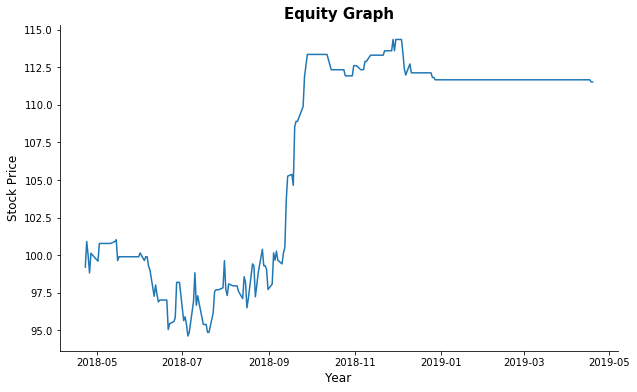

In [27]:
#draw equity graph for this strategy

fig,ax = plt.subplots(figsize=(10,6))

ax.plot(100*(strategy_returnGA+1).cumprod(), label='strategy_returnGA')

ax.set_title("Equity Graph", fontsize = 15, fontweight = "bold") 

ax.set_ylabel("Stock Price", fontsize = 12)

ax.set_xlabel("Year", fontsize = 12)

ax.spines["top"].set_visible(False) 

ax.spines["right"].set_visible(False) 

plt.show()

In [28]:
resultGA = ratio(pd.DataFrame(strategy_returnGA)).round(4)

resultGA.columns = ['strategy_returnGA']

resultGA

,strategy_returnGA
Sharpe Ratio,1.0336
Number of Up Periods,52.0000
Number of Down Periods,46.0000
Win/Loss Ratio,0.5306
Maximum Drawdown,0.0634
